<a href="https://colab.research.google.com/github/striderssoftware/Artificial_Intelligence/blob/main/PyTorchModelTrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

strider was here


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.42835 | Train accuracy: 87.69%
Test loss: 0.38209 | Test accuracy: 88.80%

Epoch: 1
---------
Train loss: 0.38093 | Train accuracy: 89.29%
Test loss: 0.33048 | Test accuracy: 90.99%

Epoch: 2
---------
Train loss: 0.36970 | Train accuracy: 89.57%
Test loss: 0.34305 | Test accuracy: 90.34%

Train time on cpu: 48.729 seconds



WOO WOO the winner is:
7


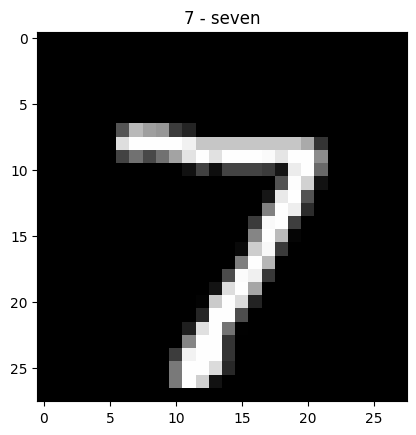




WOO WOO the winner is:
2


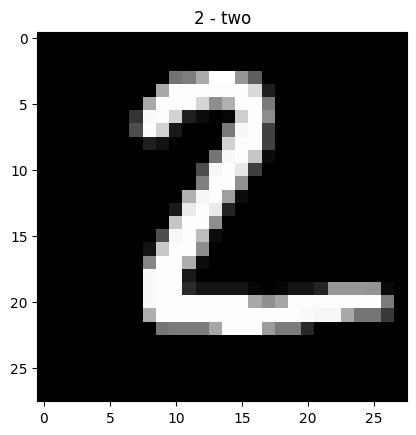




WOO WOO the winner is:
1


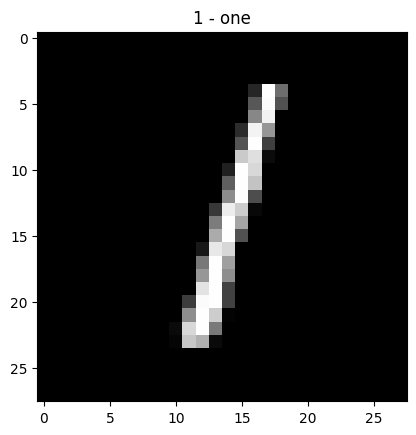




WOO WOO the winner is:
0


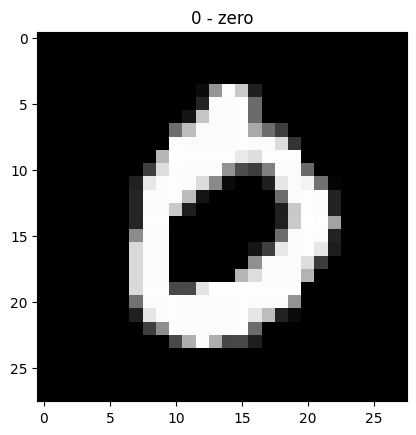




WOO WOO the winner is:
4


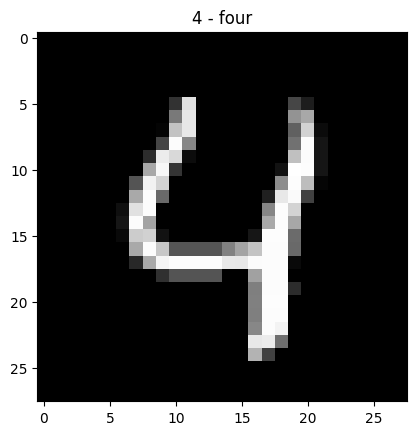




WOO WOO the winner is:
1


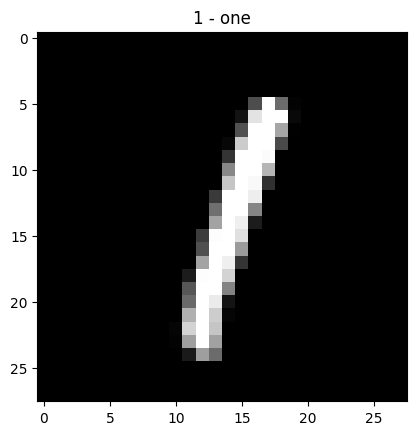




WOO WOO the winner is:
4


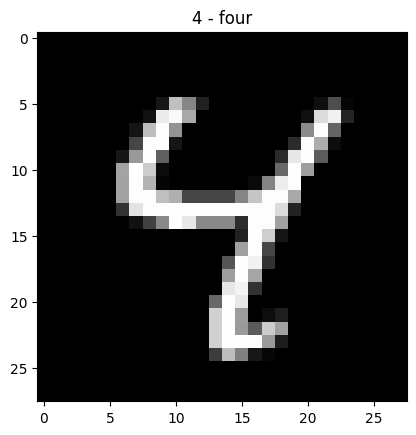




WOO WOO the winner is:
9


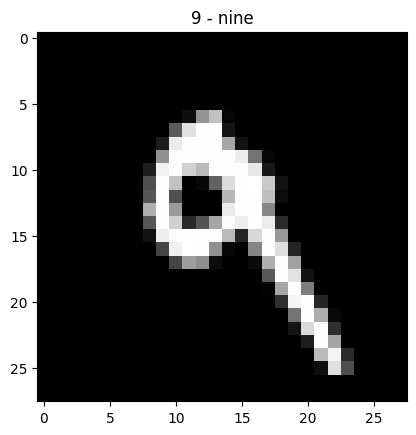




WOO WOO the winner is:
6


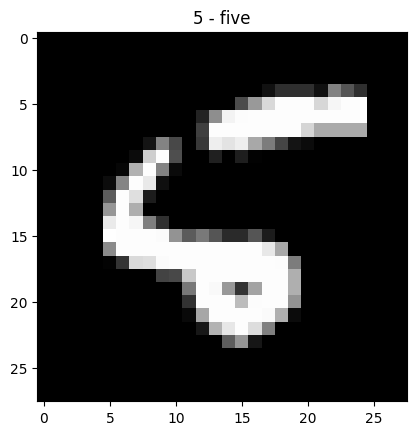




WOO WOO the winner is:
9


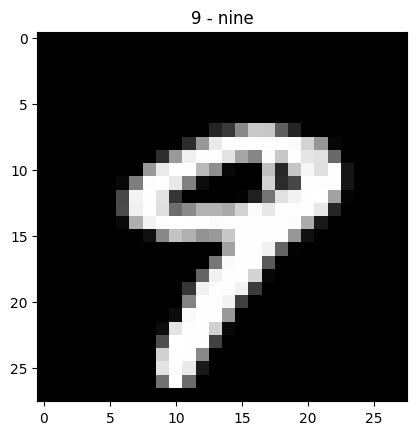




WOO WOO the winner is:
0


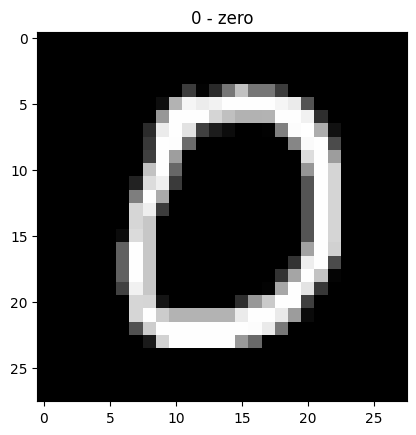




WOO WOO the winner is:
6


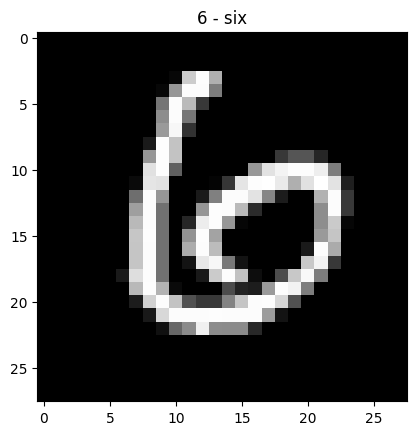




WOO WOO the winner is:
9


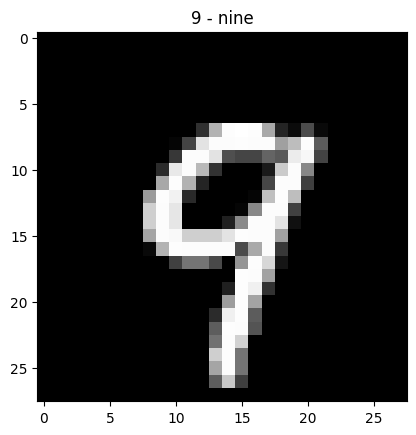




WOO WOO the winner is:
0


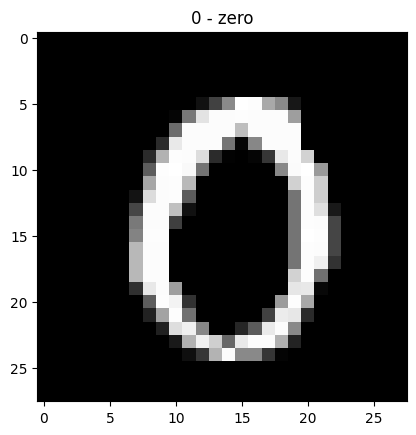




WOO WOO the winner is:
1


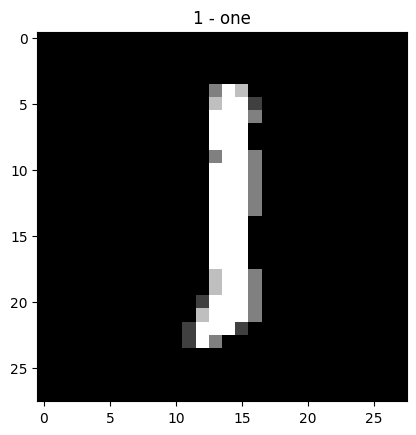




WOO WOO the winner is:
5


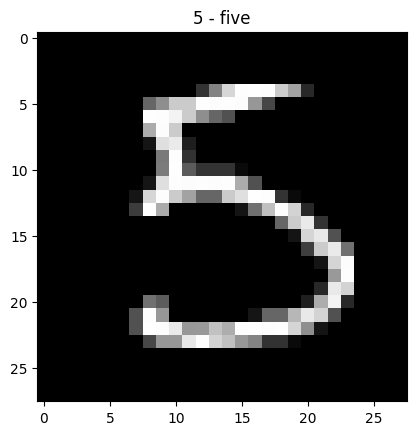




WOO WOO the winner is:
9


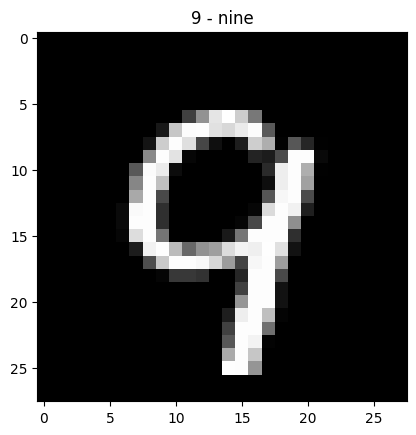




WOO WOO the winner is:
7


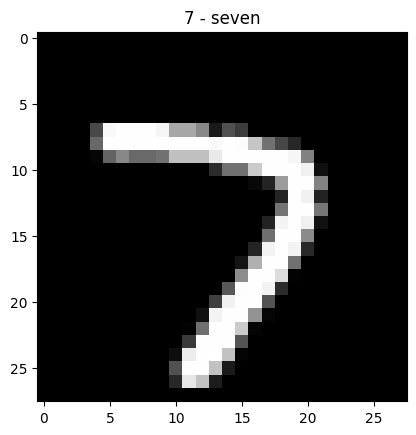




WOO WOO the winner is:
2


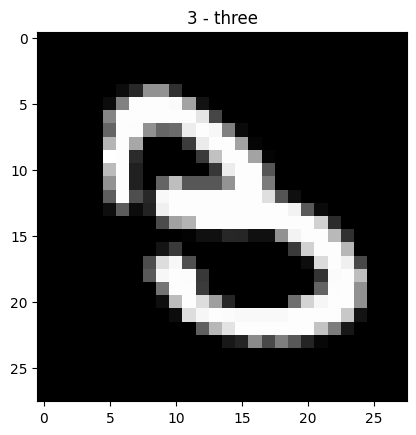




WOO WOO the winner is:
4


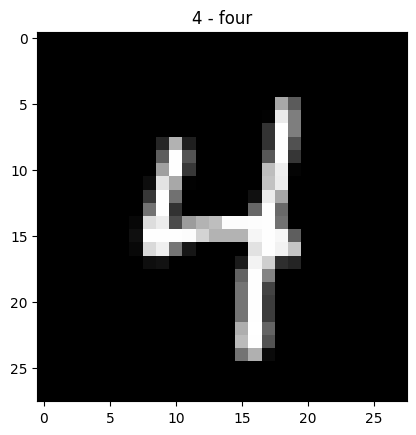




WOO WOO the winner is:
9


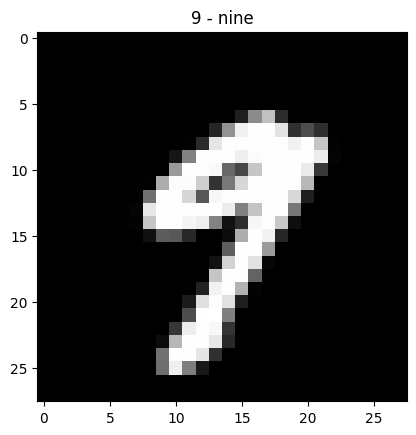

Endeeeeeee


In [2]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from torch import nn
from timeit import default_timer as timer
from tqdm.auto import tqdm
from torch import nn
from matplotlib import pyplot as plt

print ("strider was here")

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define some functions
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

def print_train_time(start: float, end: float, device: torch.device = None):
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    for batch, (X, y) in enumerate(data_loader):
        X, y = X.to(device), y.to(device)
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")


def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0

    model.eval()
    with torch.no_grad():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            test_pred = model(X)
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
            y_pred=test_pred.argmax(dim=1)
        )
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

# Model Definition
class MNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

# Get Dataset
train_data = datasets.MNIST(root="data", train=True, download=True, transform=ToTensor())
test_data = datasets.MNIST(root="data", train=False, download=True, transform=ToTensor())
class_names = train_data.classes

BATCH_SIZE = 8
train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)
train_features_batch, train_labels_batch = next(iter(train_dataloader))

# Model Creation - see Model Definition
model_0 = MNISTModelV0(input_shape=784, hidden_units=10, output_shape=len(class_names))

model_0.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

torch.manual_seed(42)
train_time_start_on_gpu = timer()
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, model=model_0, loss_fn=loss_fn, optimizer=optimizer, accuracy_fn=accuracy_fn)
    test_step(data_loader=test_dataloader, model=model_0, loss_fn=loss_fn, accuracy_fn=accuracy_fn)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu, end=train_time_end_on_gpu, device=device)

# Perform a Test of some of the test data
for index, [image, label] in enumerate(test_data):
  if index > 20:
    break

  y_pred = model_0(image)

  print ('\n\n')
  print("WOO WOO the winner is:")
  index = torch.argmax(y_pred[0].softmax(0))
  print (index.item())

  plt.imshow(image.squeeze(), cmap="gray") # image shape is [1, 28, 28] (colour channels, height, width)
  plt.title(class_names[label]);
  plt.show()

print ("Endeeeeeee")